0. Znajdź i pobierz zbiór danych BANK MARKETING z repozytorium danych UCI. Dowiedz
się co opisują pobrane dane.

1. Zrób histogram atrybutu duration dla całości danych. Następnie zrób analogiczne dwa histo-
gramy, osobno dla próbek pozytywnych i negatywnych (atrybut y równy yes albo no, odpo-
wiednio). Co ciekawego widać na tych wykresach?

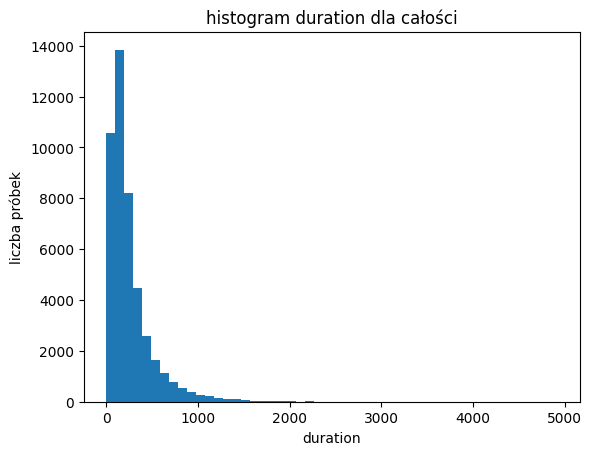

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

path = "bank-full.csv"
df = pd.read_csv(path, sep=';')
vals = (df['duration']).to_numpy()

plt.hist(vals, bins=50)
plt.xlabel('duration')
plt.ylabel('liczba próbek')
plt.title('histogram duration dla całości')
plt.show()


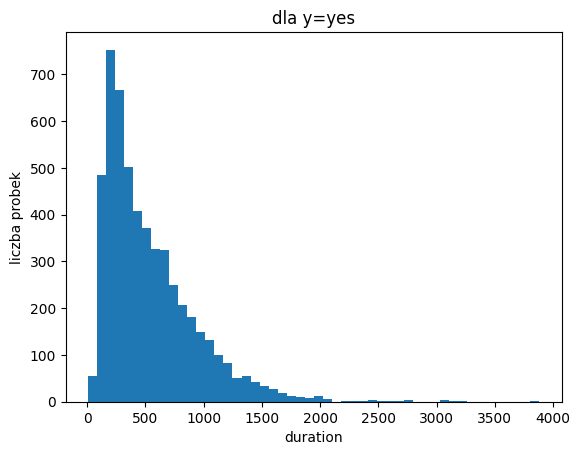

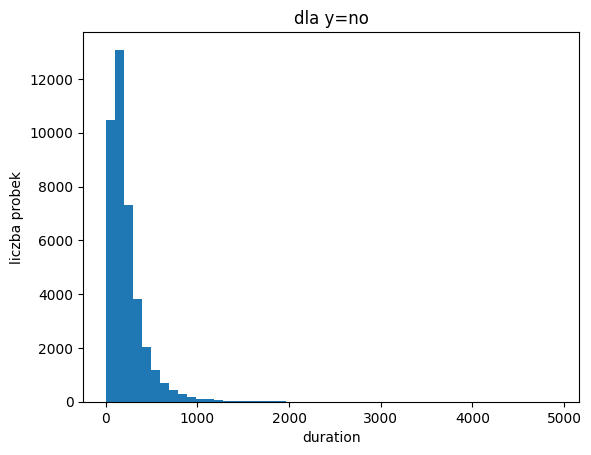

In [25]:
yes_vals = df[df['y']=='yes']['duration']
no_vals = df[df['y']=='no']['duration']

plt.hist(yes_vals, bins=50)
plt.xlabel('duration')
plt.ylabel('liczba probek')
plt.title('dla y=yes') 
plt.show()

plt.hist(no_vals, bins=50)
plt.xlabel('duration')
plt.ylabel('liczba probek')
plt.title('dla y=no') 
plt.show()

co widać:
- wiecej dluzszych rozmow kończy sie na yes,
- dla obu jest znacznie więcej rozmów krótkich niz dlugich

2. Zrób histogram atrybutu balance dla osób powyżej 25 roku życia (atrybut age większy niż 25).
Zapoznaj się z pakietem ipywidgets, a następnie przekształć swój wykres w interaktywny z
suwakiem do wybierania granicy wieku i zobacz jak zmienia się histogram.

In [ ]:
from ipywidgets import interact
import matplotlib.pyplot as plt
import pandas as pd

def plot_h(age=25):
    vals = df[df['age'] > age]['balance']
    plt.figure()
    plt.hist(vals, bins=100)
    plt.xlabel('balance')
    plt.ylabel('liczba próbek')
    plt.title(f'age > {age}')
    plt.show()

interact(plot_h, age=(18, 95, 1))

interactive(children=(IntSlider(value=25, description='age', max=95, min=18), Output()), _dom_classes=('widget…

<function __main__.plot_h(age=25)>

3. Dla ustalonego progu, t = 360, czasu trwania rozmowy (atrybut duration), wyznacz próbki
danych z atrybutem duration powyżej progu t. Policz ile procent z nich to próbki pozytywne.
Powtórz obliczenia dla różnych t i zrób wykres: na osi X próg t, na osi Y procent próbek
pozytywnych. Spróbuj wytłumaczyć zjawisko widoczne na wykresie.

In [27]:
t=360
above_t = df[df['duration']>t]
pos_above_t = above_t[above_t['y']=='yes']

count = len(pos_above_t)/len(above_t)
print(f"{count:.2%}")

32.56%


dla róznych t:

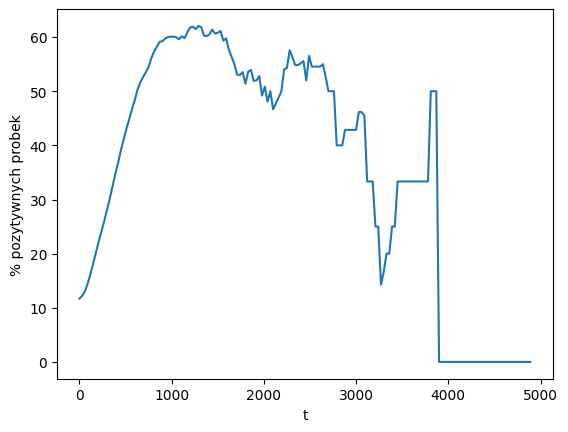

In [28]:
ts = list(range(0, int(df['duration'].max()) + 1, 30))
proc = []

for t in ts:
    above_t = df[df['duration']>t]
    pos_above_t = above_t[above_t['y']=='yes']
    count = (len(pos_above_t)/len(above_t))
    proc.append(count*100)

plt.plot(ts, proc)
plt.xlabel('t')
plt.ylabel('% pozytywnych probek')
plt.show()

4. Powtórz poprzedni punkt dla atrybutu balance. Wyobraź sobie, że przeprowadzasz kampanię
marketingową lokat bankowych. Możesz kontaktować się z losowo wybranymi (z rozkładem
jednostajnym na całych danych) klientami banku, albo jedynie z klientami o saldzie (atrybut
balance) powyżej ustalonego progu (możesz sam ustalić ten próg). Która strategia jest lepsza?
Jaki próg wybrać?

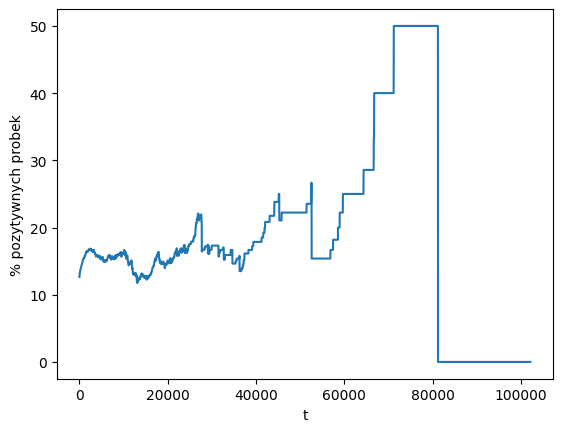

In [29]:
ts = []
ts = list(range(0, int(df['balance'].max()) + 1, 30))
proc = []

for t in ts:
    above_t = df[df['balance']>t]
    pos_above_t = above_t[above_t['y']=='yes']
    count = len(pos_above_t)/len(above_t)
    proc.append(count*100)

plt.plot(ts, proc)
plt.xlabel('t')
plt.ylabel('% pozytywnych probek')
plt.show()

5. Podziel losowo zbiór danych na dwie części porównywalnej wielkości. Używając pierwszej części
danych, zrób wykres opisany w pkt. 4 i ustal próg (według własnego pomysłu). Przyjmij,
że klienci z saldem powyżej ustalonego progu powinni być zainteresowani lokatą bankową
(powinni być próbkami pozytywnymi). Oblicz ilu z nich, procentowo, nie było. Oblicz też
ilu zainteresowanych lokatą klientów miało saldo nie większe od ustalonego progu. Następnie
policz takie błędy modelu na drugiej części danych. Powtórz obliczenia dla różnych wartości
progów. Zrób wykres (według własnego pomysłu) prezentujący wyniki. Ostatecznie, to jaki
próg wybrać?

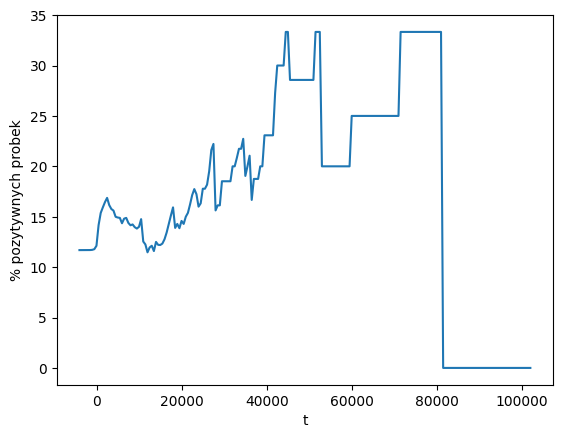

In [30]:
fst = df.sample(frac = 0.5, random_state=40)
snd = df.drop(fst.index)

ts = list(range(int(fst['balance'].min()), int(fst['balance'].max()) + 1, 500))

proc = []
for t in ts:
    above_t = fst[fst['balance']>t]
    pos_above_t = above_t[above_t['y']=='yes']
    count = len(pos_above_t)/len(above_t)
    proc.append(count*100)

plt.plot(ts, proc)
plt.xlabel('t')
plt.ylabel('% pozytywnych probek')
plt.show()

In [31]:
prog = 40000

def mistakes(prog):
    above = fst[fst['balance']> prog]
    pos = above[above['y'] == 'yes']
    fp_fst = ((len(above) - len(pos))/len(above)) * 100

    fst_yes = fst[fst['y'] == 'yes']
    miss = fst_yes[fst_yes['balance'] <= prog]
    fn_fst = (len(miss)/len(fst_yes)) * 100

    print(f"próg={prog}:  FP%={fp_fst:.2f}   FN%={fn_fst:.2f}")

mistakes(1000)
mistakes(2000)
mistakes(45000)

prog = 40000

above = snd[snd['balance']> prog]
pos = above[above['y'] == 'yes']
fp_snd = ((len(above) - len(pos))/len(above)) * 100

snd_yes = snd[snd['y'] == 'yes']
miss = snd_yes[snd_yes['balance'] <= prog]
fn_snd = (len(miss)/len(snd_yes)) * 100

print(f"próg={prog}:  FP%={fp_snd:.2f}   FN%={fn_snd:.2f}")

próg=1000:  FP%=84.74   FN%=57.80
próg=2000:  FP%=83.59   FN%=73.43
próg=45000:  FP%=66.67   FN%=99.89
próg=40000:  FP%=86.67   FN%=99.92


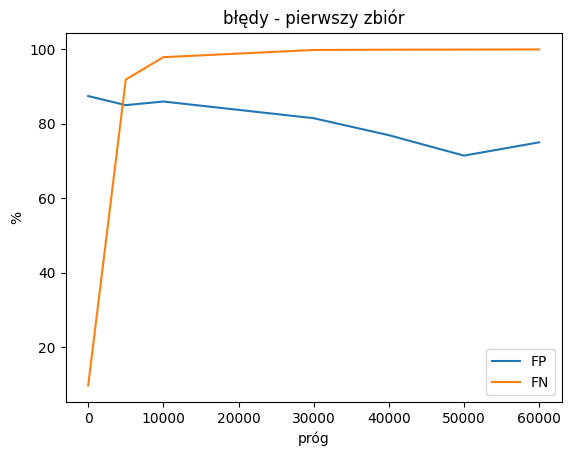

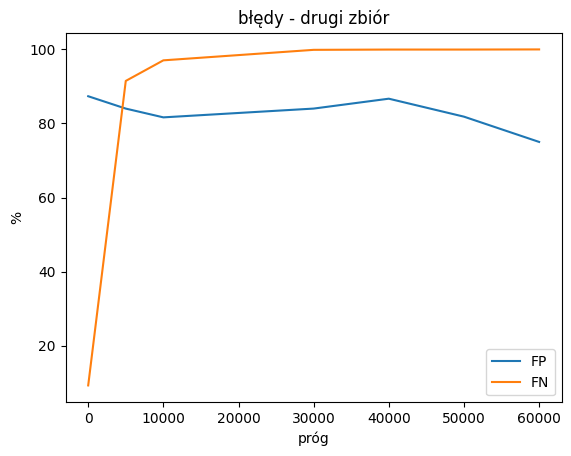

In [32]:
def mistakes(data, prog):
    above = data[data['balance']> prog]
    pos = above[above['y'] == 'yes']
    fp = (len(above) - len(pos))/len(above) * 100

    yes = data[data['y'] == 'yes']
    miss = yes[yes['balance'] <= prog]
    fn = len(miss)/len(yes) * 100

    return fp, fn

progi = [0, 5000, 10000, 30000, 40000, 50000, 60000]

fp_fst, fn_fst = [], []
for p in progi:
    fp, fn = mistakes(fst, p)
    fp_fst.append(fp)
    fn_fst.append(fn)

fp_snd, fn_snd = [], []
for p in progi:
    fp, fn = mistakes(snd, p)
    fp_snd.append(fp)
    fn_snd.append(fn)

plt.plot(progi, fp_fst, label= "FP")
plt.plot(progi, fn_fst, label= "FN")
plt.xlabel('próg')
plt.ylabel('%')
plt.legend()
plt.title('błędy - pierwszy zbiór')
plt.show()

plt.plot(progi, fp_snd, label= "FP")
plt.plot(progi, fn_snd, label= "FN")
plt.xlabel('próg')
plt.ylabel('%')
plt.legend()
plt.title('błędy - drugi zbiór')
plt.show()